<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_11_201_211_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#feature.txt file > dataframe
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

#excluding feature_name_index, 피처명만 리스트객체로 생성한 뒤 샘플로10개만추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체피처명에서 10개만추출', feature_name[:10])


전체피처명에서 10개만추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체의 움직임과 관련된 속성의 평균, 표준편차가 X,Y,Z측값으로 되어 있음을 유추가능

- 중복된 피처명을 이용할 경우 오류가 발생하므로 이를 해결하기 위해 원본 피처명에 _1 또는 _2를 추가로 부여하여 변경한 뒤 이를 이용해 데이터를 DataFrame에 로드


In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [4]:
#42개의중복피처명에대해 _1, _2를붙여반환하는 get_new_feature_name_df()
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                    if x[1] > 0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [11]:
import pandas as pd
def get_human_dataset():
  #각데이터파일은공백으로분리되어있으므로 read_csv에서공백문자를 sep으로할당당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/features.txt',sep ='\s+', header =None, names=['column_index', 'column_name'])
  
  #중복된피처명을수정하는 get_new_feature_name_df()를이용, 신규피처명 dataframe 생성성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  #데이터프레임에피처명을칼럼으로부여하기위해리스트객체로다시변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  
  #학습피처데이터세트와테스트데]피처데이터를데이터프레임으로로 로딩딩. 칼럼명은은 feature_name적용용
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/X_test.txt', sep='\s+', names= feature_name)

  #학습레이블과테스트레이블데이터를데이터프렝미으로로딩하고칼럼명을 action으로부여여
  y_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/y_train.txt', sep='\s+', header = None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/y_test.txt', sep='\s+', header = None, names=['action'])

  #로드된된 학습습/테스트용용 데이터프레임을을 모두두 반환환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [12]:
#로드된된 학습용용 피처데이터터 살펴보기기
print('##학습 피처 데이터 info()')
print(X_train.info())

#고르게게 분포되어어 있음음확인인, 피처가가 전부부 float형의의 숫자자
print(y_train['action'].value_counts())

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제반복시마다다 동일한한 예측결과도출을을 위해해 random_state 설정정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리예측정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의하이퍼파라미터추출
print('DecisionTreeClassifier 기본하이퍼 파라미터 :\n', dt_clf.get_params())


##학습 피처 데이터 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64
결정트리예측정확도: 0.8548
DecisionTreeClassifier 기본하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


약 84.5퍼센트의 정확도를 보임

결정트리의 깊이가 예측성능에 어떤 영향을 주는지 알아보기 위해 GridSearchCV에서 max_depth를 조절해보고자 함

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고평균정확도수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적하이퍼파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고평균정확도수치 : 0.8513
GridSearchCV 최적하이퍼파라미터: {'max_depth': 16}


In [17]:
#max_depth =8, 최고평균정확도결과 85로 이것이 max_depth에따라어떻게변했는지확인인
#GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터값과 그때의테스트세트트, 학습데이터세트의 정확도 수치추출
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- max depth가 8인 이후 정점을 찍고 그 이후 더 완벽한 규칙을 학습데이터에 적용하기 위해 노드를 지속적으로 분할하면서 정확도가 계속 떨어지게 됨

- 이번에는 별도의 테스트데이터 세트에서 결정 트리의 정확도를 측정해보고자 함

In [19]:
max_depths = [ 6,8,10,12,16,20,24]

#change max_depth, check accuracy in test n train data
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test, pred)
  print('max_depth = {0}, accuracy: {1:.4f}'.format(depth, accuracy))

#max_depth = 8, best accuracy = 87.07
# after max_depth=8, higher max_depth == lower accuracy 
# so, we have to control max_depth with hyper parameter

max_depth = 6, accuracy: 0.8558
max_depth = 8, accuracy: 0.8707
max_depth = 10, accuracy: 0.8673
max_depth = 12, accuracy: 0.8646
max_depth = 16, accuracy: 0.8575
max_depth = 20, accuracy: 0.8548
max_depth = 24, accuracy: 0.8548


In [20]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv=GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV best mean accuracy score:{0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV best hyper parameter :', grid_cv.best_params_)

#best accuracy score=85.5 in max depth=8, min_samples_split=16


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV best mean accuracy score:0.854879
GridSearchCV best hyper parameter : {'max_depth': 8, 'min_samples_split': 16}


In [21]:
#adapt max depth 8, min samples split 16
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정트리예측정확도: {0:.4f}'.format(accuracy))


결정트리예측정확도: 0.8717


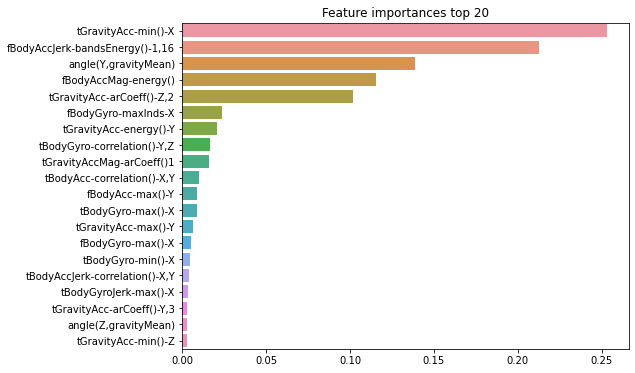

In [22]:
#find features' importance with feature_importances_
import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_
#top중요도로정렬을 쉽게하고고 seaborn의의 막대그래프로로 쉽게게 표현하기위해해 seiries 변환
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)

#중요도값순으로로 Series 정ㄹ려려
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()